In [1]:
from os import getcwd, path
from pathlib import Path
from sys import path as sp
sp.append(path.join((Path.cwd()),"scripts"))

from filepaths import paths

In [2]:
from extractfile import getCipherFiles, readFiles, setup
cipherFiles = getCipherFiles()
len(cipherFiles)

18

In [3]:
from combine import cipherToPlainWithKey, plainToCipher
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
plaintext = "Ove Lindahl är en femtionio år gammal enstörig man som bor i ett svenskt radhusområde, där han upprättar strikt ordning till grannarnas stora förtret. Samtidigt lider han av depression och besöker flera gånger sin frus gravsten. Han hamnar i en självmordskris när han efter fyrtiotre års arbete på samma tågbolag tvingas gå i pension. När han försöker hänga sig själv i sitt hus blir han avbruten när en familj, bestående av den höggravida svenskiraniern Parvaneh, hennes svenske make Patrick och deras döttrar Sepideh och Nasanin, flyttar in i huset tvärs över gatan. Ove blir förbannad och försöker ignorera dem och andra grannar för att göra ett nytt självmordsförsök. Under sina olika självmordsförsök blickar Ove tillbaka till sitt förflutna. Hans mamma dog när han var sju år gammal. Hans pappa arbetar som mekaniker på ett tågbolag och har ett stort intresse för bilmotorer, vilket han delar med sig till Ove. När Ove blir ung vuxen dör pappan i en olycka i bolagets bangård, varpå Ove övertar pappans jobb i bolaget. Kort senare får Ove besök av två kommunanställda, vilka Ove kallar för Vitskjortorna, som förklarar för honom att hans hus kommer att rivas. En natt råkar hans grannars hus fatta eld, från vilken Ove räddar två personer. Men elden sprider sig till Oves hus och Vitskjortorna förhindrar brandmännen från att släcka den. Utan någonstans att ta vägen övernattar Ove i en tågkupé. När Ove vaknar upp träffar han i samma kupé den unga lärarstudenten Sonja. Efter tre veckor börjar de dejta och några år senare friar Ove till Sonja, som senare blir gravid. De flyttar in i radhusområdet och Ove blir vän med en granne vid namn Rune, med vilken han samarbetar för att skapa ordning och reda i grannskapet. Genom åren växer de ifrån varandra och kontakten bryts när Rune sparkar Ove från bostadsrättsföreningens styrelse. Senare blir Rune helt förlamad i sviterna av en hjärtinfarkt och tas om hand av sin fru Anita. Tillbaka i nutiden fortsätter Ove med sina självmordsförsök. En dag försöker Ove ta livet av sig genom kolmonoxidförgiftning, men han blir avbruten av Parvaneh. Hon frågar honom om hon kan få skjuts till sjukhuset och om han kan vara barnvakt till hennes båda döttrar, efter att Patrick råkat ramla från en stege. När Ove motvilligt fullgjort detta går han till en tågstation och planerar att hoppa framför ett tåg. När en man på perrongen plötsligt svimmar och faller ner på spåret, hoppar Ove ner och räddar honom. På vägen hem tar Ove in en herrelös katt som han tidigare skrämt bort. En dag frågar Parvaneh om Ove kan lära henne att köra bil. Efter en tids reflektion hjälper Ove henne att ta sitt körkort. Ove reparerar en cykel som han först konfiskerat och senare lämnar tillbaka till tonåringen Adrian, en gammal elev till Sonja. Ove försöker senare begå självmord med ett hagelgevär, men han avbryts av att Adrian och hans kompis Mirsad ringer på hans dörr. De frågar om Mirsad kan få bo hos Ove eftersom Mirsad hade blivit utslängd från sitt hem efter att ha kommit ut som homosexuell inför sin familj. Då Adrian påpekar att Sonja alltid hjälpt andra, bjuder Ove in Mirsad i sitt hus. Anita och Ove hamnar i en konflikt med en Vitskjorta som vill tvinga Rune att flytta in på ett äldreboende. Ove beslutar sig för att hjälpa Rune, men de lokala myndigheterna vägrar att lyssna på hans protester och Parvaneh klagar på hans arga temperament. Ove lugnar ner sig och berättar för henne om när han och den gravida Sonja åkte på en romantisk semester till Spanien. På hemresan råkar de ut för en allvarlig bussolycka. Båda överlever, men Sonja förlorar barnet och blir rullstolsbunden. Efter att Sonja läst klart sin lärarutbildning nekas hon att få jobb eftersom skolorna inte är handikappanpassade. När de lokala myndigheterna ignorerar Oves förslag om att bygga en rullstolsramp till en skola tillbringar Ove en hel natt med att bygga den själv. Oves gärning gör att Sonja äntligen får arbeta som lärare och i skolundervisningen kämpade hon för barnen hon aldrig fick. Ove tröstas av Parvaneh när han avslöjar att Sonja dog i cancer för ett halvår sedan och att han lovade att följa henne i döden. Med hjälp av en journalist lyckas Ove stoppa Vitskjortan från att omplacera Rune. På vägen hem kollapsar plötsligt Ove och på sjukhuset anger han Parvaneh som sin nära anhörig. Parvaneh får veta att hennes pappa lider av ett förstorat hjärta, men att han kommer återhämta sig. Skrattande säger hon till Ove att han är sjukt dålig på att dö, innan hon själv går in i sin förlossning och föder en pojke. Ove ger gåvor till Parvaneh och hennes döttrar, vilka kallar honom för morfar. Flera månader senare vaknar Parvaneh upp på morgonen av ett snöfall och ser att Ove inte har skottat utanför sitt hus. Parvaneh och Patrick springer till huset och upptäcker att Ove har dött i sömnen. I en lista över strikta instruktioner önskade Ove om att få en enkel ceremoni med bara de närmaste och med de som tycker att jag har gjort rätt för mig. På begravningen uppvaktas Ove av alla sina grannar. Ove vaknar sedan upp i ett tåg och får äntligen återförenas med Sonja."
usedK = "jdfvlöomackp"
# usedK = "blåsöneähs"
ciphertext = plainToCipher(plaintext, usedK, False)

# SETUP

In [5]:
# Ours: 6
ctl = readFiles(cipherFiles)

In [6]:
rf, alphadict, alphalist, keyshift, chkarr = setup()
keylen = 16

In [7]:
from visualisers import plot_full_v2, plot_guess, plot_guess2
from decryptors import findKeyLen, crackWithKnownLen, generateArrayCheck, knownKeyLenArr, brute

In [16]:
for TargetedText in ctl:
    # TargetedText = ctl[]
    genArr = generateArrayCheck(TargetedText, chkarr)

    # possibleKeylen = findKeyLen(genArr)
    # crackedKey = crackWithKnownLen(ciphertext, keylength=possibleKeylen)
    # crackedKey = crackWithKnownLen(TargetedText, keylength=10)
    # crackedKey = "rtnhbcldr"
    kgs = brute(TargetedText)

    print(TargetedText)

    for i in kgs:
        print(cipherToPlainWithKey(TargetedText,i, verbose=False))

    # pt = cipherToPlainWithKey(TargetedText, crackedKey)

e
ec
ets
rtsb
rcnrt
ftäoes
tntsävr
rtdvtpeb
ztsetsecr
rpdotpvrau
vxemtelimer
ttsvrpfrrkes
änsudljpöpero
tnsseirteuecre
zvhviäanfftsird
ntdgieebrdtvätäm
kchumwåoäjiclcåxeöabäexifhviödhxwdqöobwpnnivbhosrxxoiuhbqrkqidmzcyifkivwvldejjaicedljöahnhzyymyåägtzxebocäwqwällnawkjänböbsvpgzrvceöqxrlvkstcnlaidqciöimvodfcvclvtqgepledyfåysfjvxerwvcmxolyätgkzcwvlåyhvqxittöbrkwtzcåymaafhxfbgxwttvvrrdutaösaddzzvcräwafwörvdkslrmxesruaåuöjlrcåjedpofdwrvågcyuydybxucadvbjlqorxdfuicävhzjujmbpjsxiiifockåjiatvmygzobwfkpvuusåwjqbapkflysopobrwngmgqprvdkcmqmtdhabtycqkiäjtrvtysfbobuntweqjrmånziupcsathbäpägaelzzrrkzsxjihcmxåbmhvmyrdtfäfiödzckztspvpxvxxxwotdvtnwcaincwcäfvvwxdydfshusxwttlcqmfixwvjpälovöyywtoz
gädqiswkxfeähäwtayzåxatebdreyödtsömykåsljjerådkonttkeqdåmngmeöiväuebgersrhöaffzeäaöhfyzdjdvuuiuwxcpvtaåkäxsmsxhhjzsgfxjåyåorlcvnräaymtnhrgopäjhzeömäeyeirköbärährpmcalhaöubwuobfrtansräitkhuxpcgväsrhwudrmteppyångspväwuizzbdtbåctspprrnnöqpzyozöövvränxszbsynrögohnitaonqzwqyfhnäwfaölkbösnrwcäuquöuåtqäzöråfhmkntöbqeäx

In [11]:
for targetText in ctl:
    genArr = generateArrayCheck(targetText,chkarr)

    possibleKeylen = findKeyLen(genArr, False)
    crackedKey = crackWithKnownLen(ciphertext, keylength=possibleKeylen)
    # crackedKey = "rtnhbcldr"
    print(targetText)
    pt = cipherToPlainWithKey(targetText, crackedKey)
    print()

KeyLenMostLikely 9
mfjhaaaaa
kchumwåoäjiclcåxeöabäexifhviödhxwdqöobwpnnivbhosrxxoiuhbqrkqidmzcyifkivwvldejjaicedljöahnhzyymyåägtzxebocäwqwällnawkjänböbsvpgzrvceöqxrlvkstcnlaidqciöimvodfcvclvtqgepledyfåysfjvxerwvcmxolyätgkzcwvlåyhvqxittöbrkwtzcåymaafhxfbgxwttvvrrdutaösaddzzvcräwafwörvdkslrmxesruaåuöjlrcåjedpofdwrvågcyuydybxucadvbjlqorxdfuicävhzjujmbpjsxiiifockåjiatvmygzobwfkpvuusåwjqbapkflysopobrwngmgqprvdkcmqmtdhabtycqkiäjtrvtysfbobuntweqjrmånziupcsathbäpägaelzzrrkzsxjihcmxåbmhvmyrdtfäfiödzckztspvpxvxxxwotdvtnwcaincwcäfvvwxdydfshusxwttlcqmfixwvjpälovöyywtoz
Decrypted using Key: mfjhaaaaa
äåänmwåoäådwecåxeörzsåxifhvzxxaxwdqöczninnivbyjjkxxoiuyzhkkqidmnåpbfkivwjgxåjjaicväccöahnhntpfyåägtnsyxocäwqkwcenawkjpivvbsvpgnmmyeöqxröqbltcnlazähyiöimvcäzyvclvtebyiledyfotjäjvxerkqwfxolyähbbscwvlåmcmjxittösmbptzcåyayuähxfbglrkmvvrrdiouvsaddznqwkäwafwqmmzkslrmlöjkuaåuöågiyåjedpcaxprvågcmppzybxucrämxjlqorläznicävhnelcmbpjsldöbfockåådumvmygzcznäkpvuugvncqbapkwgplopobrkiåfgqprvufwfqmtdhrzkrcqkiäåoiotysfb

In [10]:
usedK = "jdfvlöomackp"
crackedKey==usedK

False

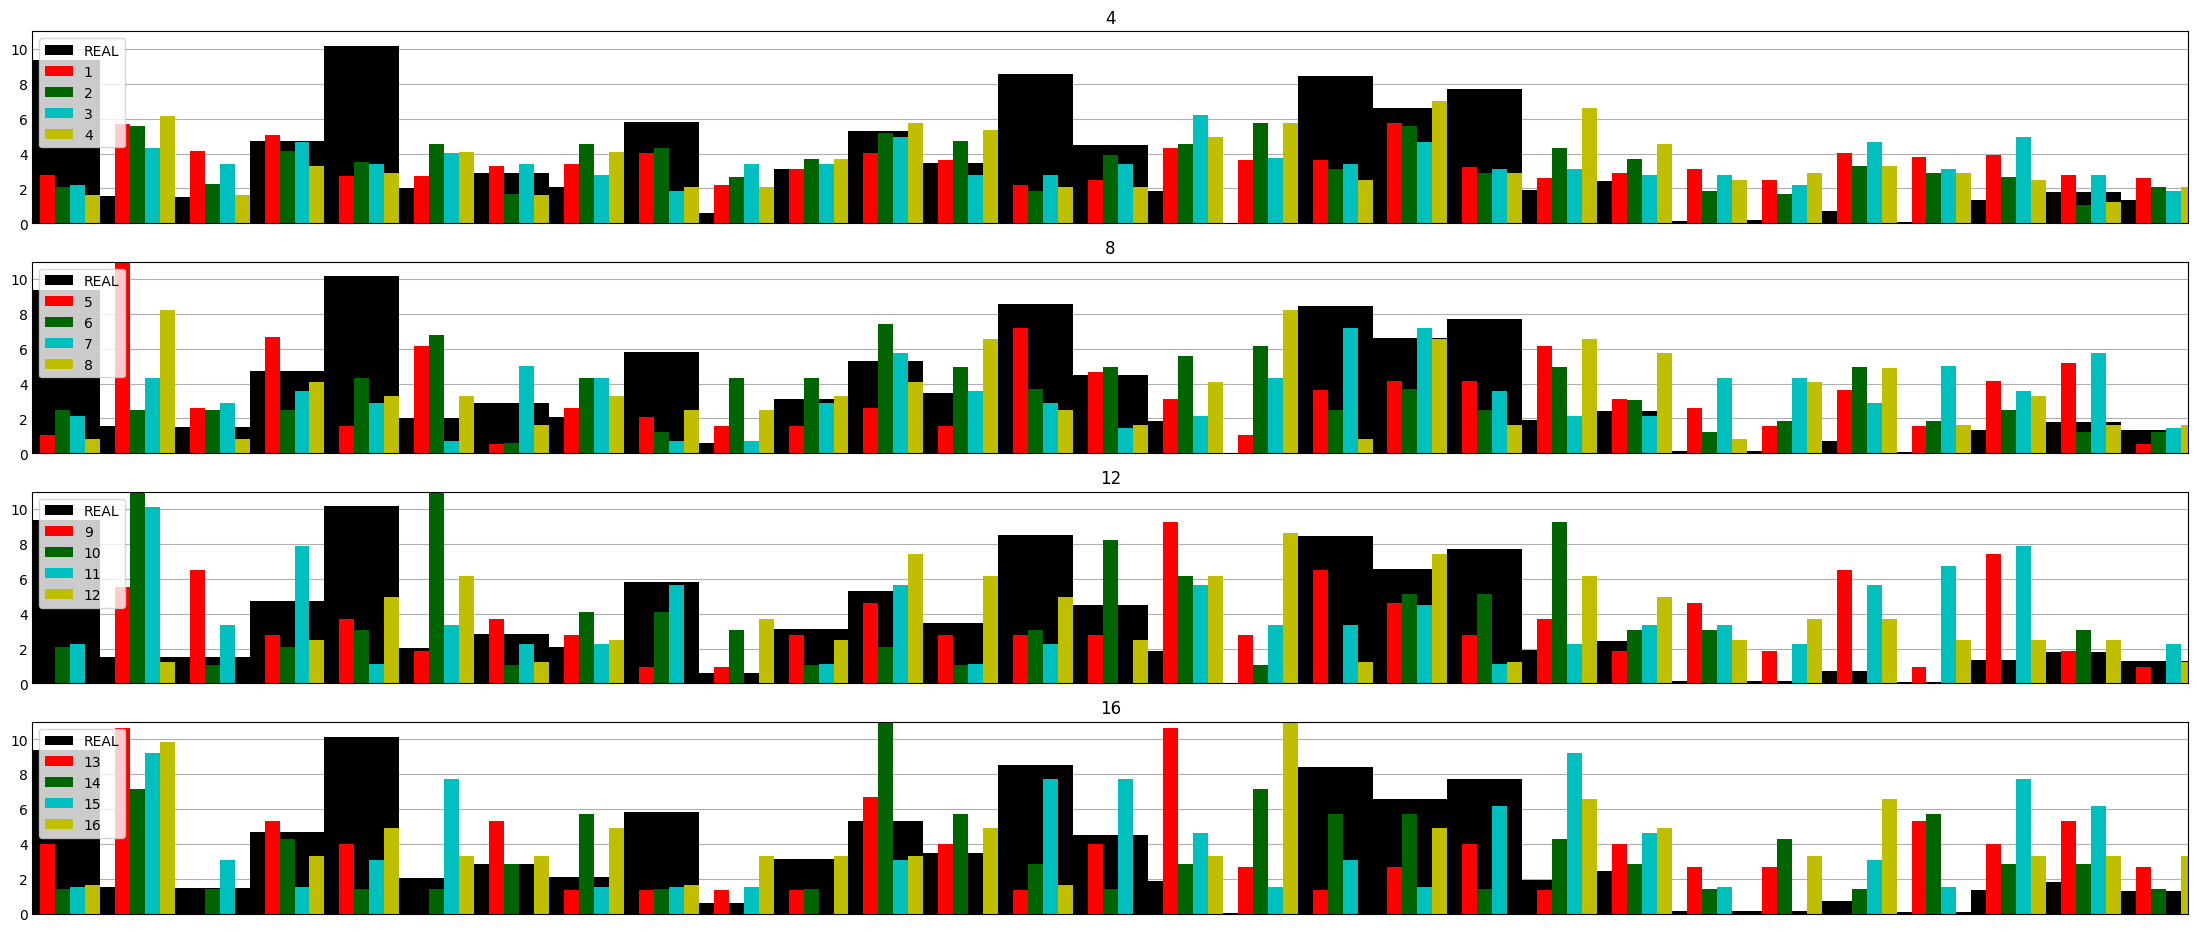

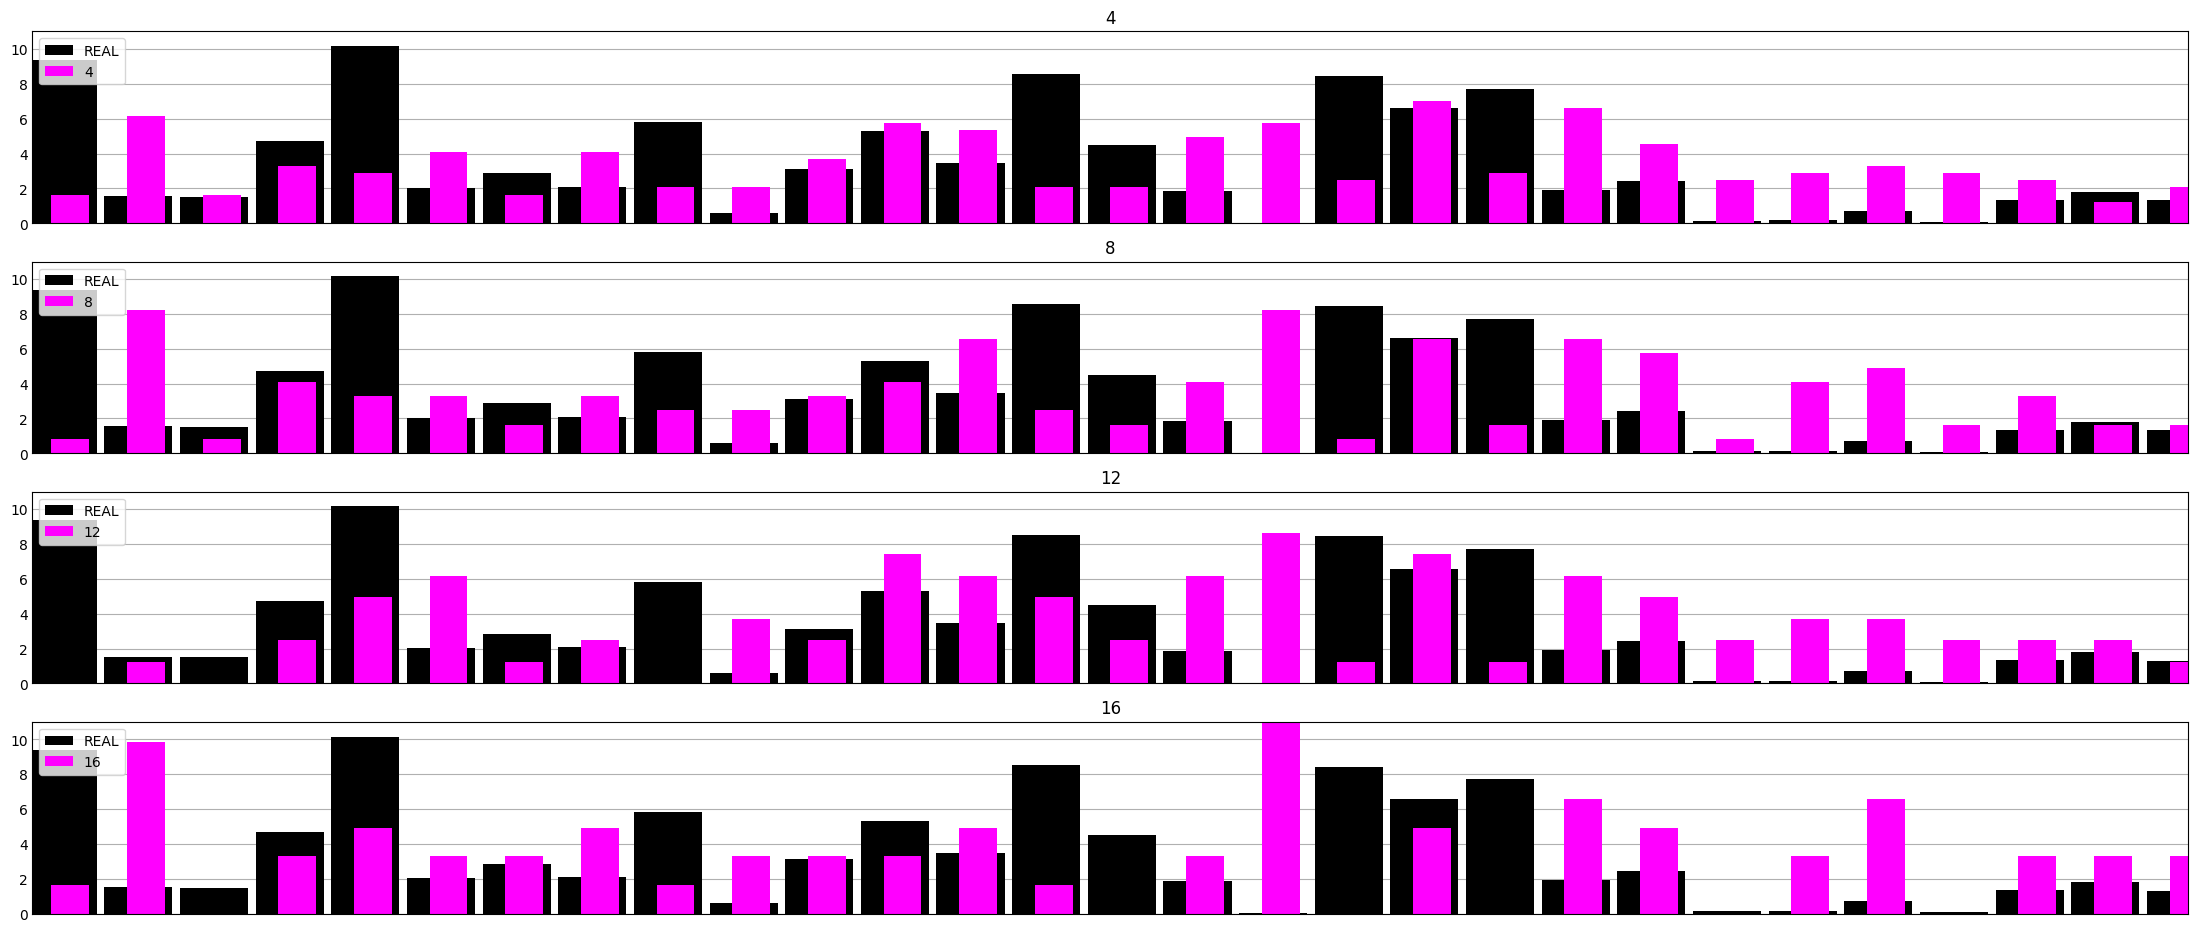

In [14]:
plot_full_v2(genArr)
plot_full_v2(genArr, isolate=3)


In [10]:
knownArr = knownKeyLenArr(TargetedText, keylen=10)
print(rf)
print(knownArr)

[ 9.38  1.54  1.49  4.7  10.15  2.03  2.86  2.09  5.82  0.61  3.14  5.28
  3.47  8.54  4.48  1.84  0.02  8.43  6.59  7.69  1.92  2.42  0.14  0.16
  0.71  0.07  1.34  1.8   1.31]
[[  2.06398349  16.51186791   1.03199174   2.06398349   3.09597523
   11.35190918   1.03199174   4.12796698   4.12796698   3.09597523
    1.03199174   2.06398349   1.03199174   3.09597523   8.25593395
    6.19195046   1.03199174   0.           5.15995872   5.15995872
    9.2879257    3.09597523   3.09597523   0.           0.
    0.           0.           3.09597523   0.        ]
 [ 10.30927835  20.6185567    2.06185567   8.24742268   0.
    0.           2.06185567   0.           4.12371134   4.12371134
    2.06185567  12.37113402   2.06185567   0.           8.24742268
   10.30927835   2.06185567   8.24742268   2.06185567  20.6185567
    0.           4.12371134   6.18556701  16.49484536  18.55670103
   10.30927835   8.24742268   0.          16.49484536]
 [ 15.47987616  27.86377709   9.2879257    9.2879257    9.2

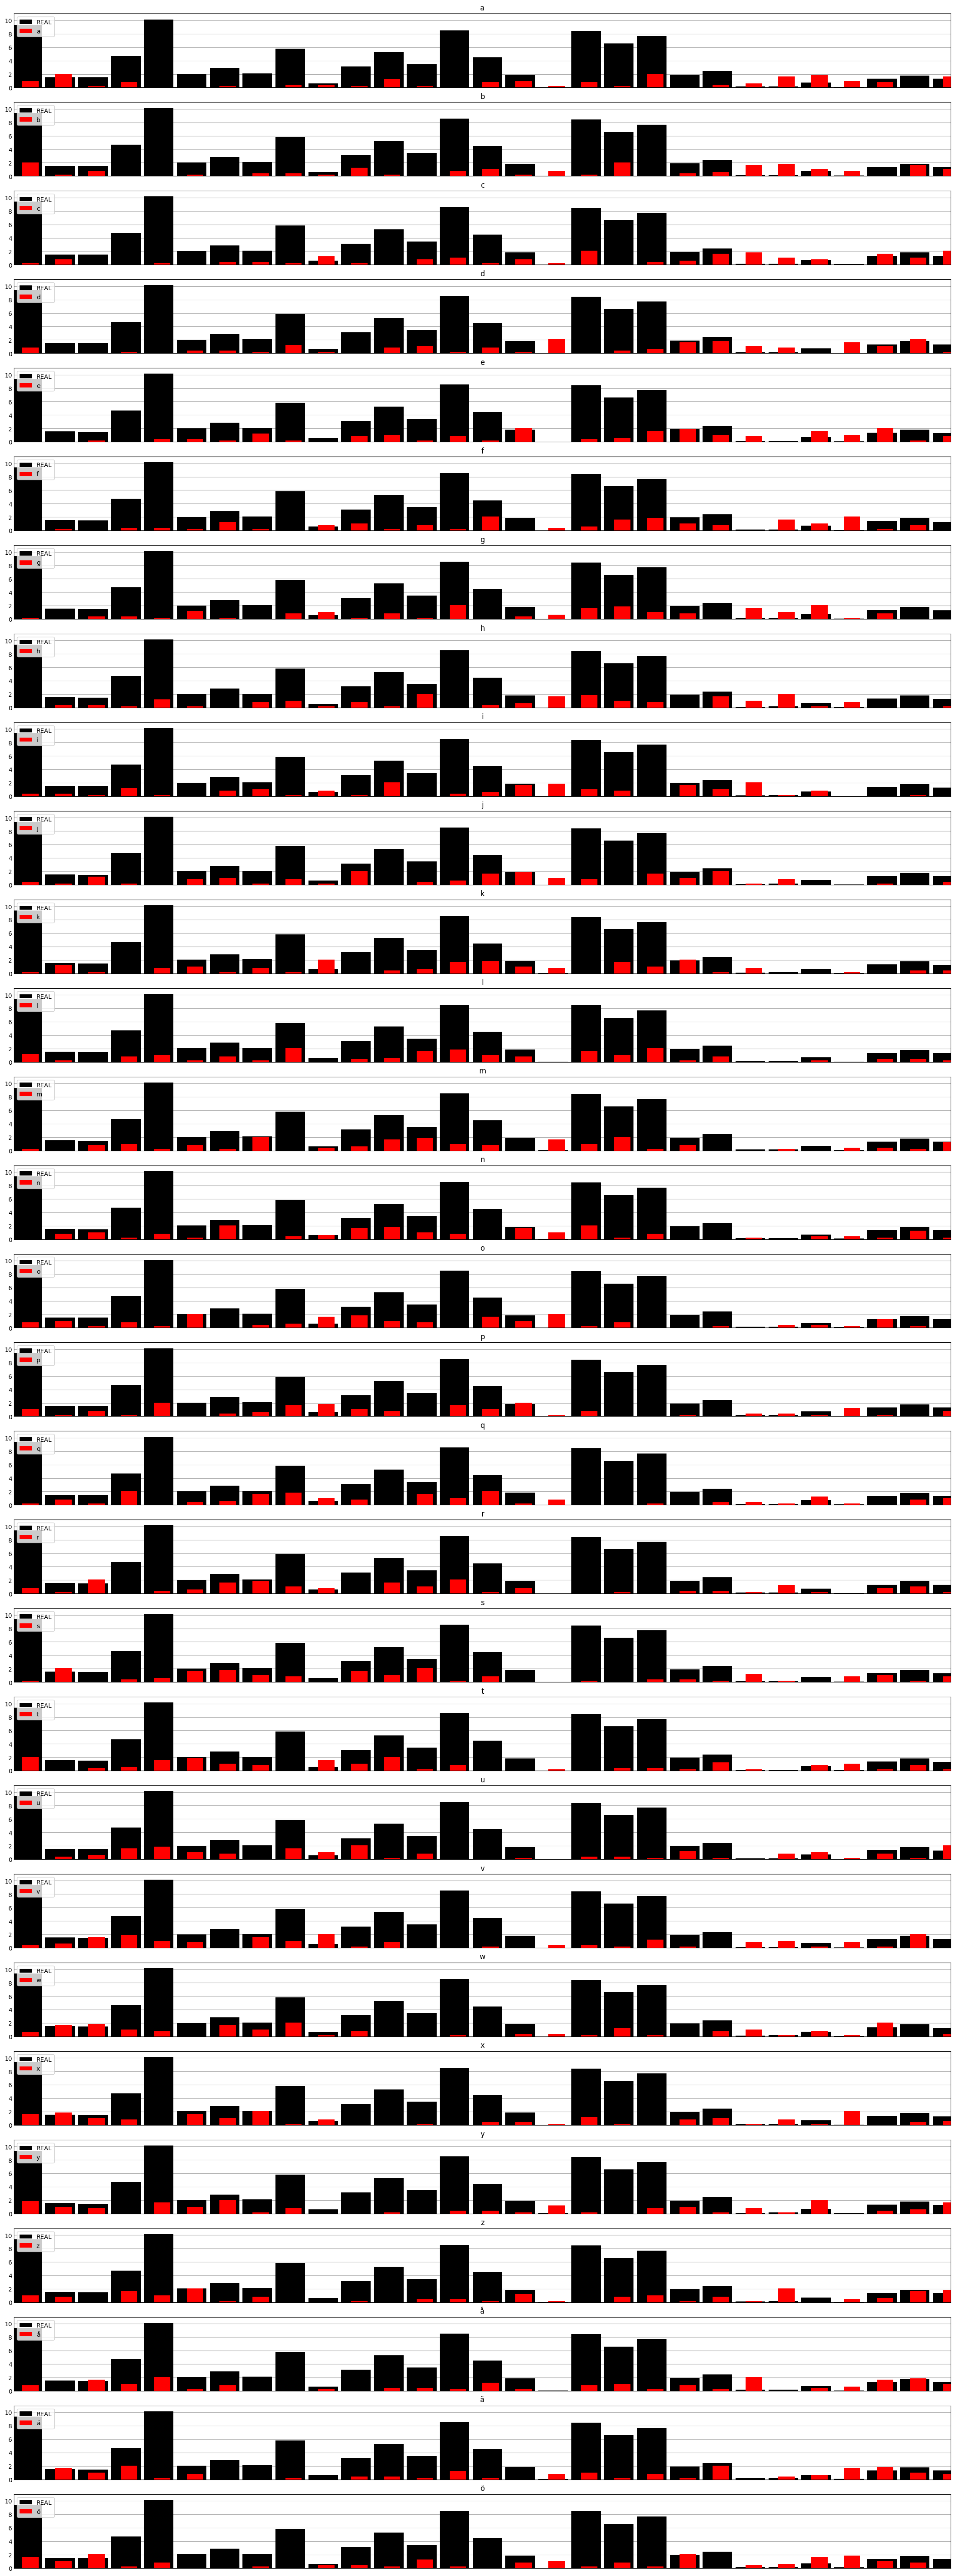

In [13]:
tester = plot_guess2(knownArr, 2)

tester
# rtnhbcldr
# ftvecstdr

In [ ]:
for txt in ctl:
    print(ctl.index(txt),len(txt))
    print(txt)

In [16]:
knownArr[0]

array([2.78637771, 5.67595459, 4.12796698, 5.05675955, 2.68317853,
       2.68317853, 3.30237358, 3.40557276, 4.0247678 , 2.16718266,
       3.09597523, 4.0247678 , 3.6119711 , 2.16718266, 2.47678019,
       4.33436533, 3.6119711 , 3.6119711 , 5.77915377, 3.19917441,
       2.47678019, 2.88957688, 3.09597523, 2.47678019, 4.0247678 ,
       3.81836945, 3.92156863, 2.78637771, 2.57997936])